In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [106]:
# https://www.kaggle.com/rakeshrau/social-network-ads
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [61]:
gender_encoder = LabelEncoder()
df['GE'] = gender_encoder.fit_transform(df['Gender'].values)

In [62]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,GE
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [66]:
X = df[['Age', 'EstimatedSalary', 'GE']].values
Y = df['Purchased'].values

MinMaxScaler -> (Data - Min) / (Max-Min)

StandardScaler -> (Data - u) / std

In [67]:
X[:10,:]

array([[    19,  19000,      1],
       [    35,  20000,      1],
       [    26,  43000,      0],
       [    27,  57000,      0],
       [    19,  76000,      1],
       [    27,  58000,      1],
       [    27,  84000,      0],
       [    32, 150000,      0],
       [    25,  33000,      1],
       [    35,  65000,      0]])

In [68]:
T = StandardScaler()
tmp = T.fit_transform(X[:,:2])

In [70]:
X = np.hstack((tmp, X[:,2].reshape(-1,1)))
X[:10,:]

array([[-1.78179743, -1.49004624,  1.        ],
       [-0.25358736, -1.46068138,  1.        ],
       [-1.11320552, -0.78528968,  0.        ],
       [-1.01769239, -0.37418169,  0.        ],
       [-1.78179743,  0.18375059,  1.        ],
       [-1.01769239, -0.34481683,  1.        ],
       [-1.01769239,  0.41866944,  0.        ],
       [-0.54012675,  2.35674998,  0.        ],
       [-1.20871865, -1.07893824,  1.        ],
       [-0.25358736, -0.13926283,  0.        ]])

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [107]:
x_train.shape

(320, 3)

In [125]:
fold = KFold(50)

In [126]:
model = KNeighborsClassifier(5, algorithm='brute')

In [127]:
scores = []
for ti, vi in fold.split(x_train):
    x_t, x_v = x_train[ti,:] , x_train[vi,:]
    y_t, y_v = y_train[ti] , y_train[vi]
    model.fit(x_t, y_t)
    scores.append(model.score(x_v, y_v))
    

In [128]:
scores

[1.0,
 1.0,
 0.7142857142857143,
 1.0,
 0.7142857142857143,
 0.8571428571428571,
 0.8571428571428571,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8571428571428571,
 0.8571428571428571,
 1.0,
 0.7142857142857143,
 1.0,
 1.0,
 1.0,
 0.8571428571428571,
 0.6666666666666666,
 1.0,
 1.0,
 0.6666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0]

In [129]:
np.mean(scores)

0.9119047619047619

In [103]:
model.score(x_train, y_train)

0.915625

In [104]:
model.score(x_test, y_test)

0.9125

In [91]:
p = model.predict(x_test)
confusion_matrix(y_test, p)

array([[44,  3],
       [ 6, 27]])

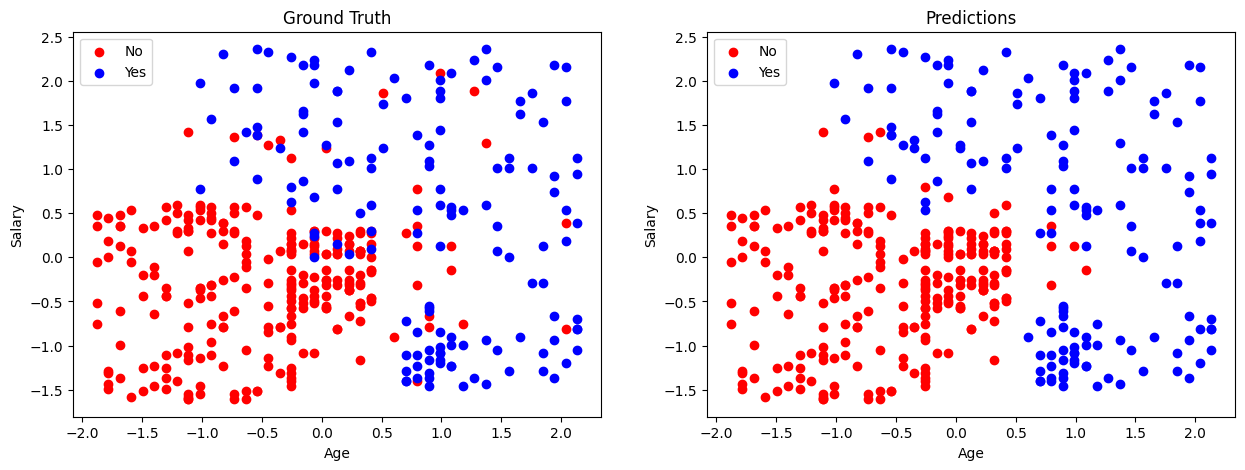

In [81]:
plt.figure(figsize=(15,5))
plt.subplot(121)
y_no = Y==0
plt.scatter(X[y_no,0], X[y_no,1], c='r')
plt.scatter(X[~y_no,0], X[~y_no,1], c='b')
plt.title("Ground Truth")
plt.xlabel('Age')
plt.ylabel("Salary")
plt.legend(['No', 'Yes'])
plt.subplot(122)
Y_P = model.predict(X)
y_no = Y_P==0
plt.scatter(X[y_no,0], X[y_no,1], c='r')
plt.scatter(X[~y_no,0], X[~y_no,1], c='b')
plt.title("Predictions")
plt.xlabel('Age')
plt.ylabel("Salary")
plt.legend(['No', 'Yes']);

In [32]:
y_no

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])